<a href="https://colab.research.google.com/github/sbolivara16/Molecular-Docking/blob/main/ROC_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📊 ***Understanding the ROC Curve***


*👋 The ROC (Receiver Operating Characteristic) curve is a graphical representation of a binary classifier's performance at different classification thresholds. It's a popular tool in machine learning, medical diagnostics, and other fields where classification accuracy is crucial.*

📊 *The ROC curve is a two-dimensional plot with the True Positive Rate (TPR) on the y-axis and the False Positive Rate (FPR) on the x-axis. TPR is the proportion of positive instances that are correctly classified as positive, while FPR is the proportion of negative instances that are incorrectly classified as positive.*

🎯 *The perfect classifier has a TPR of 1 and an FPR of 0, resulting in a curve that hugs the top-left corner of the plot. On the other hand, a random classifier has a diagonal curve from the bottom-left to the top-right of the plot.*

📈 *AUC (Area Under the Curve) is a common metric used to evaluate the performance of a binary classifier model. It measures the area under the ROC curve and ranges from 0 to 1, with higher values indicating better performance. AUC is a useful metric because it summarizes the classifier's performance across all possible thresholds, making it a convenient way to compare the performance of different classifiers. *

In [ ]:
#@title **📊 First let's install the libraries, it's going to take a few minutes, make yourself a coffee.**☕🍩🍫🧑‍🔬👨‍💻
!pip install pandas matplotlib scikit-learn


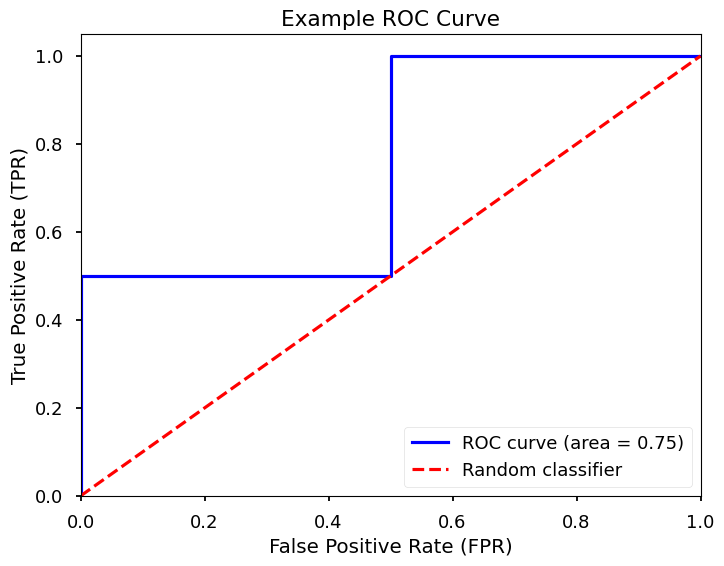

In [31]:
#@title  🤔 💡**An example of roc curve**
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc


y_true = np.array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1])
y_score = np.array([0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99])

fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'b', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Example ROC Curve')
plt.legend(loc="lower right")
plt.show()





In [9]:
#@title **Let's import your file, remember that it must be in .csv format ⚠️** 
import pandas as pd

df = pd.read_csv('Pru1.csv')


In [10]:
#@title **👩‍💻let's begin the calculations**
from sklearn.model_selection import train_test_split

X = df[['afinidad', 'Ki_Experimental']]
y = df['clase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [12]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]


In [13]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


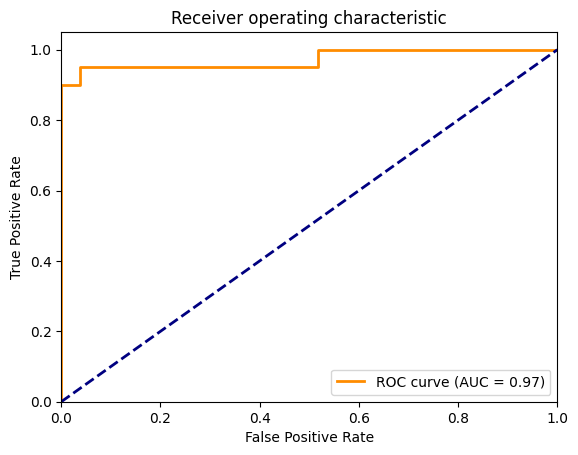

In [14]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [17]:
#@title **Run to check for missing data**
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [19]:
#@title **Calculate Precision, Recall, F1-score of your model 📝**
from sklearn.model_selection import train_test_split

# Divide data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing data in the training set
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Training the model on the imputed training set
clf = LogisticRegression(random_state=42)
clf.fit(X_train_imputed, y_train)

# Impute missing data in the test set
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Obtain the predictions of your model on the imputed test data set.
y_pred = clf.predict(X_test_imputed)

# Calculate evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)




Precision: 1.0
Recall: 0.9
F1-score: 0.9473684210526316
